<a href="https://colab.research.google.com/github/felipemoreia/Data-Science-com-Python---Awari/blob/master/Projeto_unidade_6_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Awari - Data Science

## Projeto Unidade 6

Neste projeto você irá realizar uma análise estatística de um dos dataset mais famosos da comunidade de Data Science, o dataset **Titanic**.

Esse dataset contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas a seguir.

O dataset disponibilizado tem quase a mesma estrutura de uma planilha do excel, com linhas e colunas. O tipo do arquivo é o CSV ou Comma-separated values, que seriam Valores Separados por Vírgula, porque é exatamente assim que ele funciona, você distingue que o valor pertence a diferentes colunas porque a vírgula está ali separando uns dos outros.

O objetivo deste projeto é você aplicar os principais conceitos que você aprendeu na unidade 6.
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

### Carregando os dados

In [0]:
import sys
import pandas as pd


# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv("titanic.csv")

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [0]:
dados['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

38,38% dos passageiros sobreviveu ao Titanic

### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?
Dica: usa a função _describe()_ do pandas

In [0]:
dados['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Na média, a faixa etária era de 29 anos. 75% dos passageiros tinham até 38 anos. E o passageiro mais velho tinha 80 anos.

### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [0]:
dados[dados['Survived']==1]['Sex'].value_counts(normalize=True)*100

female    68.128655
male      31.871345
Name: Sex, dtype: float64

68% dos sobreviventes eram mulheres e 31% homens

### 4. Qual a média e desvio padrão dos homens sobreviventes? 

In [0]:
dados[dados['Survived']==1][dados['Sex']=='male']['Age'].describe()

C:\Users\epfel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64

A idade média dos homens sobreviventes era de 27 anos, com desvio padrão de 16,50.

### 5. Repita os cálculos do item 4 utilizando uma amostra aleatória de 100 passageiros e calculo o erro da média e desvio padrão.

In [0]:
from random import sample

In [0]:
amostra = sample(range(891), k=100)
dfamostra = dados.iloc[amostra]
dfamostra['Age'].describe()

count    83.000000
mean     27.868434
std      14.306376
min       0.420000
25%      19.000000
50%      27.000000
75%      38.000000
max      60.000000
Name: Age, dtype: float64

Os dados são muito parecidos. A idade média segue sendo de 27 anos, e o desvio padrão tem uma queda para 14,30.

### 6. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](# Referência: http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

survived = quantitativa discreta (Binária)
pclass = qualitativa ordinal
name = qualitativa nominal
sex = qualitativa nominal
age = quantitativa continua

### 7. Qual o tipo de classe de passagem mais frequente nos dados?

In [0]:
dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

A terceira classe é a classe mais frequênte, o que já era esperado. No entanto, pudemos constatar também que a segunda classe é a mais rara no dataset.

### 8. Qual a média e desvio padrão do valor das passagens?

In [0]:
dados['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Média de 32.20 e desvio padrão de 49,69.

### 9. A partir dos dados do dataset calcule:

* a) Qual a probabilidade de um homem com idade entre 15 e 30 anos ter sobrevivido?

* b) Qual a probabilidade de uma mulher de mais de 40 anos e um homem de mais de 50 anos terem sobrevivido?

* c) Calcule as probabilidade de sobrevivência de cada uma das 3 classes (1a, 2a e 3a classe).

In [0]:
dados[(dados['Sex']=='male') & (dados['Age']>=15) & (dados['Age']<=30)].shape[0]

212

In [0]:
dados[(dados['Sex']=='male')& (dados['Age']>=15) & (dados['Age']<=30) & (dados['Survived']==1)].shape[0]

31

In [0]:
prob1 = 31/212*100
print('A probabilidade de um homem com idade entre 15 e 30 anos ter sobrevivido é de: {:.2f}%'.format(prob1))

A probabilidade de um homem com idade entre 15 e 30 anos ter sobrevivido é de: 14.62%


In [0]:
dados[(dados['Sex']=='female')& (dados['Age']>40)].shape[0]

48

In [0]:
dados[(dados['Sex']=='female')& (dados['Age']>40) & (dados['Survived']==1)].shape[0]

37

In [0]:
prob2 = 37/48*100
print('A probabilidade de uma mulher de mais de 40 anos ter sobrevivido é de: {:.2f}%'.format(prob2))

A probabilidade de uma mulher de mais de 40 anos e um homem de mais de 50 anos terem sobrevividoé de: 77.08%


In [0]:
dados[(dados['Sex']=='male')& (dados['Age']>50)].shape[0]

47

In [0]:
dados[(dados['Sex']=='male')& (dados['Age']>50) & (dados['Survived']==1)].shape[0]

6

In [0]:
prob3 = 6/47
print('A probabilidade de um homem de mais de 50 anos ter sobrevivido é de: {:.2f}%'.format(prob3))

A probabilidade de um homem de mais de 50 anos ter sobrevivido é de: 0.13%


Considerando que se tratam de eventos independentes, a chance de os dois terem sobrevividos juntos é de 0.0231%

In [0]:
primeira = dados[dados['Pclass']==1].shape[0]
segunda = dados[dados['Pclass']==2].shape[0]
terceira = dados[dados['Pclass']==3].shape[0]
sobreviventes1 = dados[(dados['Pclass']==1) & (dados['Survived']==1)].shape[0]
sobreviventes2 = dados[(dados['Pclass']==2) & (dados['Survived']==1)].shape[0]
sobreviventes3 = dados[(dados['Pclass']==3) & (dados['Survived']==1)].shape[0]

print('Taxa de sobreviventes na primeira classe:', sobreviventes1/primeira)
print('Taxa de sobreviventes na segunda classe:', sobreviventes2/segunda)
print('Taxa de sobreviventes na terceira classe:', sobreviventes3/terceira)

Taxa de sobreviventes na primeira classe: 0.6296296296296297
Taxa de sobreviventes na segunda classe: 0.47282608695652173
Taxa de sobreviventes na terceira classe: 0.24236252545824846


### 10. Existe correlação entre a idade e as chances de sobreviver? Crie um gráfico de pontos (scatter plot) relacionando essas variáveis.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [0]:
taxas = []
for x in dados['Age']:
    total = dados[dados['Age']==x].shape[0]
    vivos = dados[(dados['Age']==x) & (dados['Survived']==1)].shape[0]
    if total != 0:
        taxa = vivos/total
    else:
        taxa = 0 
    taxas.append(taxa)

In [0]:
dados['survivor_rate'] = pd.Series(taxas)

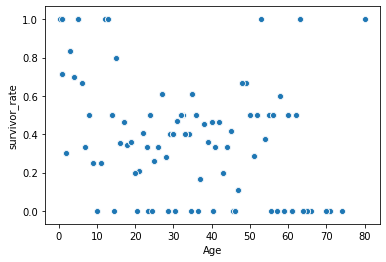

In [0]:
sns.scatterplot(x='Age', y='survivor_rate', data=dados)

Não se trata de uma relação linear, nesse caso, apenas a variavel idade não explica a taxa de sobrevivência.

### 11. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

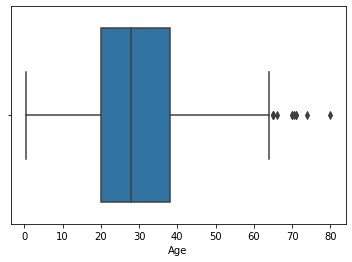

In [0]:
sns.boxplot(x='Age', data=dados)

Sim, existem. O dataset contém valores acima de 65 anos, que para essa distribuição é um outlier.

### 12. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


In [0]:
age = dados['Age'].fillna(0)
pclass = dados['Pclass'].fillna(0)
fare = dados['Fare'].fillna(dados['Fare'].mean())

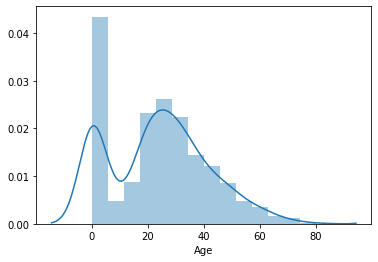

In [0]:
sns.distplot(age)

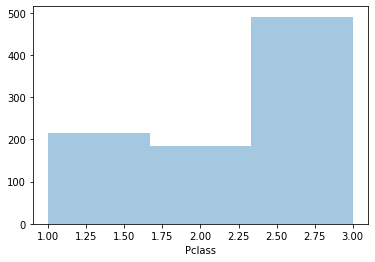

In [0]:
sns.distplot(pclass, bins=3, kde=False)

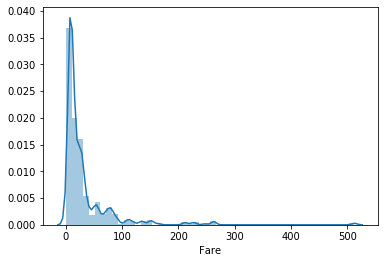

In [0]:
sns.distplot(fare)

A coluna idade contém muitos outliers, nesse caso, ela reflete bem a média que já havíamos constatado com a maioria das idades distribuídas em torno de 27 anos. A distribuição de classes também nos mostra que a maioria dos passageiros estava na última classe e isso reflete no valor pago pelo ticket, a maioria tendo o valor inferior a 50, mas com outliers que levam o valor até 500. 

### Awari -  <a href="https://awari.com.br/"> awari.com.br</a>